In [1]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [2]:
files = glob.glob('../BL_Work/openPrescribe/savings/*.h5')
files.sort()
print files

['../BL_Work/openPrescribe/savings/201008.h5', '../BL_Work/openPrescribe/savings/201009.h5', '../BL_Work/openPrescribe/savings/201010.h5', '../BL_Work/openPrescribe/savings/201011.h5', '../BL_Work/openPrescribe/savings/201012.h5', '../BL_Work/openPrescribe/savings/201101.h5', '../BL_Work/openPrescribe/savings/201102.h5', '../BL_Work/openPrescribe/savings/201103.h5', '../BL_Work/openPrescribe/savings/201104.h5', '../BL_Work/openPrescribe/savings/201105.h5', '../BL_Work/openPrescribe/savings/201106.h5', '../BL_Work/openPrescribe/savings/201107.h5', '../BL_Work/openPrescribe/savings/201108.h5', '../BL_Work/openPrescribe/savings/201109.h5', '../BL_Work/openPrescribe/savings/201110.h5', '../BL_Work/openPrescribe/savings/201111.h5', '../BL_Work/openPrescribe/savings/201112.h5', '../BL_Work/openPrescribe/savings/201201.h5', '../BL_Work/openPrescribe/savings/201202.h5', '../BL_Work/openPrescribe/savings/201203.h5', '../BL_Work/openPrescribe/savings/201204.h5', '../BL_Work/openPrescribe/savings

In [3]:
# pdp = pd.read_hdf(files[0])

In [4]:
# %store -r opiod_BNF
%store -r antiDep_BNF

In [5]:
opiod_BNF = antiDep_BNF

In [6]:
LSOA_dist = json.load(open('GP_LSOA_PATIENTSDIST.json','rb'))

In [7]:
opiod_BNF.head()

,Unnamed: 0,BNF_code,NAME,UNII_drugbank
285,285,0204000P0,Pindolol ...,BJ4HF6IU1D
295,295,020400010,Pindolol With Diuretic ...,BJ4HF6IU1D
673,673,0305010W0,Doxapram Hydrochloride ...,94F3830Q73
765,765,0401020B0,Buspirone Hydrochloride ...,TK65WKS8HL
767,767,0401020D0,Chlordiazepoxide ...,6RZ6XEZ3CR


In [8]:
ward_pop = pd.read_csv('ward_pop.csv')

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
ward_pop.head()

,Ward Code 1,Ward Name 1,Local Authority,All Ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,E05000026,Abbey,Barking and Dagenham,"15,133",351,332,361,311,328,290,...,18,15,22,14,14,19,12,6,10,14
1,E05000027,Alibon,Barking and Dagenham,"10,853",178,185,205,205,196,222,...,31,32,23,22,34,20,14,20,17,59
2,E05000028,Becontree,Barking and Dagenham,"14,466",303,304,285,320,294,271,...,28,25,22,29,19,22,15,19,11,65
3,E05000029,Chadwell Heath,Barking and Dagenham,"11,140",196,176,175,177,199,168,...,60,41,44,43,33,38,35,28,22,146
4,E05000030,Eastbrook,Barking and Dagenham,"11,464",185,156,177,172,165,156,...,54,46,51,56,42,37,28,29,30,139


In [10]:
GP_META = pd.read_csv('../BL_Work/epraccur.csv',header=None)
GP_META.rename(columns={0:'BP_code',
                        1:'Name',
                        2:'Grouping',
                        3:'National_geo',
                        4:'Addr1',
                        5:'Addr2',
                        6:'Addr3',
                        7: 'Addr4',
                        8:'Addr5',
                        9:'Postcode',
                        10:'Open',
                        11:'Closed',
                        12:'Status',
                        13:'Org type code',
                        14:'Commissioner',
                        15:'Join provider',
                        16:'Left provider',
                        17:'Contact',
                        18:'Null1',
                        19:'Null2',
                        20:'Null3',
                        21:'Amended',
                        22:'Null4',
                        23:'Provider',
                        24:'Null5',
                        25:'Setting',
                        26:'Null6'}, 
                 inplace=True)

In [11]:
Open_filtered_GPs = {}
for index,row in GP_META.iterrows():
    if row ['Setting'] == 4 and row['Status'] =='A':
        Open_filtered_GPs[row['BP_code']] = row['Postcode'].strip()

In [12]:
population = {}
for index, row in ward_pop.iterrows():
    population[row['Ward Code 1']] = float(row['All Ages'].replace(',',''))

In [13]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        population_borough[name] += float(row['All Ages'].replace(',',''))

In [17]:
# pdp.head()

In [19]:
# rantadine = pdp.loc[pdp['16'] == '0103010T0']

In [20]:
# rantadine[rantadine['15']==150]

In [22]:
# opioids = pdp.loc[pdp['16'].isin(opiod_BNF['BNF_code'])]
# opioids = pdp

In [23]:
# non_generic_opioid = opioids.loc[opioids['20']!='AA']

In [24]:
# sum(non_generic_opioid['23'])

In [25]:
# sum(opioids['7'])

In [26]:
# len(non_generic_opioid), len(opioids)

In [27]:
# GP_postcodes_long = {}
# for name , group in non_generic_opioid.groupby('2'):
#     postcode = list(set(group['10']))
#     GP_postcodes_long[name] = str(postcode[0]).strip()

In [14]:
ward_df = pd.read_csv('../BL_Work/pcd11_par11_wd11_lad11_ew_lu.csv')

# ward_df.head()

ward_postcode_map = {}
for name, group in ward_df.groupby('wd11cd'):
    ward_postcode_map[name] = list(group['pcds'])

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (5,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
ward_df.head()

,pcd7,pcd8,pcds,par11cd,par11nm,par11nmw,wd11cd,wd11nm,wd11nmw,lad11cd,lad11nm,lad11nmw
0,AL1 1AG,AL1 1AG,AL1 1AG,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
1,AL1 1AJ,AL1 1AJ,AL1 1AJ,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
2,AL1 1AR,AL1 1AR,AL1 1AR,NaN,NaN,NaN,E05004789,Cunningham,NaN,E07000100,St Albans,NaN
3,AL1 1AS,AL1 1AS,AL1 1AS,NaN,NaN,NaN,E05004799,St Peters,NaN,E07000100,St Albans,NaN
4,AL1 1BH,AL1 1BH,AL1 1BH,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN


In [16]:
# LSOA_savings = {}

# for name, group in tqdm(non_generic_opioid.groupby('2')):
#     total_saving = np.sum(group['23'])
#     if name in LSOA_dist:        
#         for k in LSOA_dist[name]:
#             if k not in LSOA_savings:
#                 LSOA_savings[k] = 0.0
#             LSOA_savings[k]+= float(total_saving)*float(LSOA_dist[name][k])

In [17]:
%store -r Ward_prevalence
%store -r Ward_patients
%store -r DiseasePop_byWard

In [18]:
df = pd.read_csv('../BL_Work/Lower_Layer_Super_Output_Area_2011_to_Ward_2015_Lookup_in_England_and_Wales.csv')

In [19]:
df_city = pd.read_csv('../BL_Work/lower_layer_super_output_area_2011_to_major_towns_and_cities_december_2015_lookup_in_england_and_wales.csv')

In [20]:
df.head()

,LSOA11CD,LSOA11NM,WD15CD,WD15NM,WD15NMW,LAD15CD,LAD15NM,FID
0,E01000104,Barking and Dagenham 014B,E05000041,Village,,E09000002,Barking and Dagenham,1
1,E01000105,Barking and Dagenham 014C,E05000041,Village,,E09000002,Barking and Dagenham,2
2,E01000106,Barking and Dagenham 014D,E05000041,Village,,E09000002,Barking and Dagenham,3
3,E01000107,Barking and Dagenham 010C,E05000041,Village,,E09000002,Barking and Dagenham,4
4,E01000108,Barking and Dagenham 010D,E05000041,Village,,E09000002,Barking and Dagenham,5


In [35]:
cityMap = {}
for name , group in df_city.groupby('TCITY15NM'):
        cityMap[name] = list(group['LSOA11CD'])

In [36]:
IMD_df = pd.read_csv('../BL_Work/File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv')

In [37]:
LSOA_pop = {}
for index, row in IMD_df.iterrows():
    LSOA_pop[row['LSOA code (2011)']] = row['Total population: mid 2012 (excluding prisoners)']

In [38]:
cityPop = {}
for k in cityMap:
    pop = 0
    for j in cityMap[k]:
        try:
            pop += LSOA_pop[j]
        except:
            print("could not find LSOA",j)
    if pop > 0:
        cityPop[k] = pop
             

('could not find LSOA', 'W01001912')
('could not find LSOA', 'W01001913')
('could not find LSOA', 'W01001600')
('could not find LSOA', 'W01001651')
('could not find LSOA', 'W01001601')
('could not find LSOA', 'W01001652')
('could not find LSOA', 'W01001602')
('could not find LSOA', 'W01001653')
('could not find LSOA', 'W01001654')
('could not find LSOA', 'W01001603')
('could not find LSOA', 'W01001604')
('could not find LSOA', 'W01001655')
('could not find LSOA', 'W01001605')
('could not find LSOA', 'W01001606')
('could not find LSOA', 'W01001607')
('could not find LSOA', 'W01001659')
('could not find LSOA', 'W01001608')
('could not find LSOA', 'W01001660')
('could not find LSOA', 'W01001609')
('could not find LSOA', 'W01001661')
('could not find LSOA', 'W01001610')
('could not find LSOA', 'W01001662')
('could not find LSOA', 'W01001611')
('could not find LSOA', 'W01001663')
('could not find LSOA', 'W01001612')
('could not find LSOA', 'W01001664')
('could not find LSOA', 'W01001613')
(

In [39]:
cityPop

{'Barnsley': 92556,
 'Basildon': 109220,
 'Basingstoke': 108508,
 'Bath': 96154,
 'Bedford': 90384,
 'Birkenhead': 88496,
 'Birmingham': 1093675,
 'Blackburn': 119280,
 'Blackpool': 146477,
 'Bolton': 172631,
 'Bournemouth': 190932,
 'Bracknell': 79449,
 'Bradford': 345921,
 'Brighton and Hove': 232538,
 'Bristol': 541934,
 'Burnley': 83156,
 'Burton upon Trent': 73102,
 'Bury': 75276,
 'Cambridge': 147973,
 'Carlisle': 76453,
 'Chatham': 76537,
 'Chelmsford': 111351,
 'Cheltenham': 116080,
 'Chester': 81503,
 'Chesterfield': 89149,
 'Colchester': 122452,
 'Coventry': 330337,
 'Crawley': 108302,
 'Darlington': 91096,
 'Derby': 258462,
 'Doncaster': 109563,
 'Dudley': 77431,
 'Eastbourne': 109604,
 'Exeter': 115158,
 'Gateshead': 119487,
 'Gillingham': 106709,
 'Gloucester': 139980,
 'Grimsby': 88386,
 'Guildford': 78129,
 'Halifax': 91677,
 'Harlow': 80094,
 'Harrogate': 73295,
 'Hartlepool': 88004,
 'Hastings': 90345,
 'Hemel Hempstead': 96912,
 'High Wycombe': 104398,
 'Huddersfield'

In [40]:
# cityMap

In [41]:
# %store cityPop
# % store cityMap

In [42]:
wardMap = {}
for name , group in df.groupby('WD15CD'):
        wardMap[name] = list(group['LSOA11CD'])

In [43]:
boroughMap = {}
for name , group in df.groupby('LAD15NM'):
        boroughMap[name] = list(group['LSOA11CD'])

In [44]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        population_borough[name] += float(row['All Ages'].replace(',',''))

In [45]:
borough_savings_UK = {}

for k in boroughMap:
    try:
        borough_savings= np.sum([LSOA_savings[w] for w in boroughMap[k] if not np.isnan(LSOA_savings[w])])
        pop = population_borough[k]
        borough_savings_UK[k] = (float(borough_savings)/float(pop))*1000.0
        
    except:
        print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [46]:
city_savings_UK = {}

for k in cityMap:
    try:
        city_savings = np.sum([LSOA_savings[w] for w in cityMap[k] if w in LSOA_savings ])
        pop = cityPop[k]
        city_savings_UK[k] = (float(city_savings)/float(pop))*1000.0
        
    except:
        print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [47]:
len(city_savings_UK)

0

In [48]:
files[17:29]

['../BL_Work/openPrescribe/savings/201201.h5',
 '../BL_Work/openPrescribe/savings/201202.h5',
 '../BL_Work/openPrescribe/savings/201203.h5',
 '../BL_Work/openPrescribe/savings/201204.h5',
 '../BL_Work/openPrescribe/savings/201205.h5',
 '../BL_Work/openPrescribe/savings/201206.h5',
 '../BL_Work/openPrescribe/savings/201207.h5',
 '../BL_Work/openPrescribe/savings/201208.h5',
 '../BL_Work/openPrescribe/savings/201209.h5',
 '../BL_Work/openPrescribe/savings/201210.h5',
 '../BL_Work/openPrescribe/savings/201211.h5',
 '../BL_Work/openPrescribe/savings/201212.h5']

In [49]:
monthly_borough_savings = {}
monthly_borough_dosage = {}
monthly_borough_costs = {}
fail = 0
for f in tqdm(files):
# for f in tqdm(files[17:29]):
    month = f.split('/')[-1].split('.')[0]
    monthly_borough_savings[month] = {}
    pdp = pd.read_hdf(f)
    opioids = pdp#.loc[pdp['16'].isin(opiod_BNF['BNF_code'])]
    non_generic_opioid = opioids.loc[opioids['20']!='AA']
    LSOA_savings = {}
    LSOA_dosage = {}
    LSOA_costs = {}
    for name, group in opioids.groupby('2'):
        total_dosage = np.sum(group['19'])
        total_cost = np.sum(group['7'])
        if name in LSOA_dist:        
            for k in LSOA_dist[name]:
                if k not in LSOA_dosage:
                    LSOA_dosage[k] = 0.0
                    LSOA_costs[k] = 0.0
                LSOA_dosage[k]+= float(total_dosage)*float(LSOA_dist[name][k])
                LSOA_costs[k]+= float(total_cost)*float(LSOA_dist[name][k])
    
    for name, group in non_generic_opioid.groupby('2'):
        total_saving = np.sum(group['23'])
        if name in LSOA_dist:        
            for k in LSOA_dist[name]:
                if k not in LSOA_savings:
                    LSOA_savings[k] = 0.0
                LSOA_savings[k]+= float(total_saving)*float(LSOA_dist[name][k])
    
    borough_savings_UK = {}
    borough_dosage_UK = {}
    borough_cost_UK = {}
    
    for k in boroughMap:
        try:
            borough_savings= np.sum([LSOA_savings[w] for w in boroughMap[k] if not np.isnan(LSOA_savings[w])])
            borough_dosages= np.sum([LSOA_dosage[w] for w in boroughMap[k] if not np.isnan(LSOA_dosage[w])])
            borough_costs= np.sum([LSOA_costs[w] for w in boroughMap[k] if not np.isnan(LSOA_costs[w])])
            
            pop = population_borough[k]
            borough_savings_UK[k] = float(borough_savings)
            borough_dosage_UK[k] = (float(borough_dosages)/float(pop))*1000.0
            borough_cost_UK[k] = (float(borough_costs)/float(pop))*1000.0

        except:
            fail+=1
    

    #Evaluate things at city level
#     for k in cityMap:
#         try:
#             borough_savings= np.sum([LSOA_savings[w] for w in cityMap[k] if not np.isnan(LSOA_savings[w])])
#             borough_dosages= np.sum([LSOA_dosage[w] for w in cityMap[k] if not np.isnan(LSOA_dosage[w])])
#             borough_costs= np.sum([LSOA_costs[w] for w in cityMap[k] if not np.isnan(LSOA_costs[w])])
            
#             pop = cityPop[k]
#             borough_savings_UK[k] = float(borough_savings)
#             borough_dosage_UK[k] = (float(borough_dosages)/float(pop))*1000.0
#             borough_cost_UK[k] = (float(borough_costs)/float(pop))*1000.0

#         except:
#             fail+=1
    
    monthly_borough_savings[month]  = borough_savings_UK
    monthly_borough_dosage[month]  = borough_dosage_UK
    monthly_borough_costs[month] = borough_cost_UK

In [21]:
import pickle as pkl 
# pkl.dump(monthly_borough_savings,open('City_savings.pkl','wb'))

# pkl.dump(monthly_borough_dosage,open('City_dosage.pkl','wb'))

# pkl.dump(monthly_borough_costs,open('City_costs.pkl','wb'))


monthly_borough_savings = pkl.load(open('All_costs.pkl','rb'))

monthly_borough_dosage = pkl.load(open('All_dosage.pkl','rb'))

monthly_borough_costs = pkl.load(open('All_costs.pkl','rb'))



In [22]:
cityOverSpending = {}
for k in monthly_borough_savings:
    for city in monthly_borough_savings[k]:
        if city not in cityOverSpending:
            cityOverSpending[city] = 0
        else: 
            cityOverSpending[city]+=monthly_borough_savings[k][city]
for k in cityOverSpending:
    cityOverSpending[k] = cityOverSpending[k]/1000000

In [23]:
common = list(set(cityOverSpending.keys()).intersection(population_borough.keys()))
# len(common)
# common.remove('London')
# common.remove('Birmingham')

In [24]:
%store -r IMD_city

In [25]:
len(common)

326

In [26]:
# np.sum(totalCost.values()) , np.sum(totalOverspend.values())

In [27]:
def label_point(x, y, val, ax ):
    a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),fontsize=15)

predict = []
gt = []
names = []
selected_city = ['Birmingham', 'London' , 'Bolton' , 'Leicester' , 'Blackpool' , 'Oxford' , 'Cambridge' , 'Nottingham' ]
for k in common:
#     predict.append(np.log(cityPop[k]))
    predict.append(np.log(population_borough[k]))
    gt.append(np.log(cityOverSpending[k]))
    if k in selected_city:
        names.append(k)
    else:
        names.append('')

In [29]:
totalOverSpend = np.log(np.sum(cityOverSpending.values()))
logSumOverspend = np.sum([np.log(k) for k in cityOverSpending.values()])

totalCityPop = np.log(np.sum(cityPop.values()))
logSumPop = np.sum([np.log(k) for k in cityPop.values()])
print totalOverSpend , totalCityPop
print logSumOverspend , logSumPop

NameError: name 'cityPop' is not defined

In [30]:
normalized_over = {}
for k in common:
    normalized_over[k] = (cityOverSpending[k]/logSumOverspend) / (population_borough[k]/logSumPop)
import operator
sorted_over = sorted(normalized_over.items(), key=operator.itemgetter(1))
print sorted_over[:11]

print sorted_over[-10:]

NameError: name 'logSumPop' is not defined

In [31]:
IMD = []
ratio = []
for k in common:
    IMD.append(IMD_city[k])
    ratio.append(normalized_over[k])
    
pearsonr(IMD, ratio)

KeyError: 'Mendip'

In [32]:
from scipy.stats import linregress

corr = pearsonr(predict, gt)
print corr

slope, intercept, r_value, p_value, std_err = linregress(x=predict,y=gt)

print slope,  intercept , r_value , p_value , std_err

(-0.11456051951183711, 0.038704985393765545)
-0.032241121869696396 0.5508868650792044 -0.11456051951183713 0.03870498539376483 0.015532234352448347


Text(0.1,0.7,'$R^2$: 0.01')

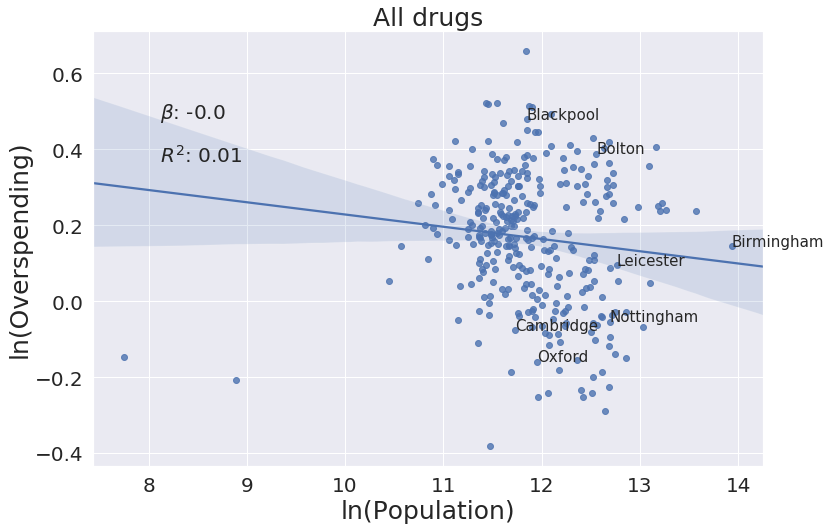

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
p = sns.regplot(x=predict,y=gt,ax=ax)
ax.set_xlabel("ln(Population)",fontsize=25)
ax.set_ylabel("ln(Overspending)",fontsize=25)
ax.set_title("All drugs",fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
label_point(predict , gt , names , ax)
ax.annotate(r"$\beta$" +": " +  str(slope)[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)
# ax.annotate(r"$\alpha$" +": " +  str(intercept)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)
ax.annotate(r"$R^2$" +": " +  str(r_value**2)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)


In [33]:
total_monthly_costs = {}
for k in monthly_borough_costs:
    total_monthly_costs[k] = {}
    for b in monthly_borough_costs[k]:
#         scale = float( cityPop[b])/1000.0
        scale = float( population_borough[b])/1000.0
        total_monthly_costs[k][b] = monthly_borough_costs[k][b]*scale
        
# total_monthly_costs

In [34]:
totalCost = {}
totalOverspend = {}
for k in monthly_borough_savings:
    totalOverspend[k] = np.sum(monthly_borough_savings[k].values())
    totalCost[k] = np.sum(total_monthly_costs[k].values())

In [35]:
UKwide_opioid = {}
UKUKwide_opioid_costs = {}
for k in monthly_borough_savings:
    UKwide_opioid[k] = sum(monthly_borough_savings[k].values())
for k in monthly_borough_costs:
    total = []
    for b in monthly_borough_costs[k]:
        scale = float( population_borough[b])/1000.0
        total.append(monthly_borough_costs[k][b]*scale)
    UKUKwide_opioid_costs[k] = total

In [36]:
all_overspend = {}
all_overspend['savings'] = totalOverspend
all_overspend['costs'] = totalCost

In [37]:
# %store opioid_overspend
# %store all_overSpend
# %store -r all_overSpend

In [38]:
# all_monthly_borough_savings = monthly_borough_savings

# %store all_monthly_borough_savings
# %store -r monthly_borough_savings

In [39]:
# %store -r monthly_borough_savings

In [40]:
IMD_District = json.load(open('District_IMD_scores_life_values.json','rb'))

In [41]:
IMD_District

{u'Adur': {u'District Code': [u'E07000223'],
  u'IMD': {u'mean_values': {u'Barriers to Housing and Services Score': 17.706571428571433,
    u'Crime Score': -0.1049047619047619,
    u'Education, Skills and Training Score': 28.01047619047619,
    u'Employment Score (rate)': 0.10511904761904763,
    u'Health Deprivation and Disability Score': -0.005071428571428567,
    u'Income Score (rate)': 0.12354761904761905,
    u'Living Environment Score': 18.868476190476194},
   u'median_values': {u'Barriers to Housing and Services Score': 17.7195,
    u'Crime Score': 0.030500000000000003,
    u'Education, Skills and Training Score': 26.0565,
    u'Employment Score (rate)': 0.086,
    u'Health Deprivation and Disability Score': -0.0365,
    u'Income Score (rate)': 0.10250000000000001,
    u'Living Environment Score': 17.901}},
  u'Life Values': {u'Anxiety': -1,
   u'Happiness': -1,
   u'Life Satisfaction': 56.42,
   u'Worthwhile': 45.7},
  u'aggregate_IMD': 18.275,
  u'pop_density': 1466.0302032741

In [52]:
savings = {}
for month in monthly_borough_savings:
    for dist in monthly_borough_savings[month]:
        if dist not in savings:
            savings[dist] = 0.0
        else:
            savings[dist]+=monthly_borough_savings[month][dist]
dose = {}
for month in monthly_borough_dosage:
    for dist in monthly_borough_dosage[month]:
        if dist not in dose:
            dose[dist] = 0.0
        else:
            dose[dist]+=monthly_borough_dosage[month][dist]

cost = {}
for month in total_monthly_costs:
    for dist in total_monthly_costs[month]:
        if dist not in cost:
            cost[dist] = 0.0
        else:
            cost[dist]+=total_monthly_costs[month][dist]

            
dict_saving = {'Name':[],'Savings':[] , 'Dosage':[] , 'Density' : [] , 'Seniors' : [] , 'IMD' : [] , 'TotalCost':[], 'Population':[]}
for s in savings:
    dict_saving['Name'].append(s)
    dict_saving['Savings'].append(savings[s])
    dict_saving['TotalCost'].append(cost[s])
    dict_saving['Dosage'].append(dose[s])
    dict_saving['Density'].append(IMD_District[s]['pop_density'])
    dict_saving['Population'].append(np.log10(IMD_District[s]['population']))
    dict_saving['Seniors'].append(IMD_District[s]['senior_pop'])
    dict_saving['IMD'].append(IMD_District[s]['aggregate_IMD'])



savings_df = pd.DataFrame(dict_saving)

In [53]:
savings_df

,Density,Dosage,IMD,Name,Population,Savings,Seniors,TotalCost
0,148.343861,3.308934e+07,17.204,Mendip,5.040424,1.158119e+06,0.273837,1.310191e+08
1,3034.575799,2.860907e+07,33.114,Hastings,4.955904,1.134445e+06,0.241353,1.053933e+08
2,731.965927,2.855573e+07,8.857,Windsor and Maidenhead,5.163823,9.801287e+05,0.228971,1.467145e+08
3,501.819129,3.446021e+07,22.066,Wyre Forest,4.991554,1.330556e+06,0.294166,1.330650e+08
4,540.901368,2.604836e+07,27.659,Peterborough,5.269113,8.972314e+05,0.188738,1.765168e+08
5,372.224833,2.611547e+07,15.263,Epping Forest,5.100646,1.098936e+06,0.249024,1.427771e+08
6,100.484142,3.879891e+07,19.789,Breckland,5.117099,1.432173e+06,0.296102,1.963839e+08
7,68.324381,4.103766e+07,12.670,Hambleton,4.952061,1.409464e+06,0.299099,1.276848e+08
8,957.794920,2.996446e+07,12.547,Christchurch,4.681124,1.223921e+06,0.376227,6.076157e+07
9,3217.686574,3.416836e+07,22.958,Dudley,5.496361,1.376091e+06,0.252209,4.369888e+08


In [54]:
england = gp.read_file('../BL_Work/Local_Authority_Districts_December_2017_Ultra_Generalised_Clipped_Boundaries_in_United_Kingdom_WGS84.shp')

In [55]:
england.head()

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.471405e+08,78666.802657,(POLYGON ((-1.200218311029187 54.5830013303063...
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.064738e+08,86947.340766,POLYGON ((-1.193937249483723 54.62987548771687...
4,5,E06000005,Darlington,None,428029,515649,-1.56835,54.535351,1.982990e+08,91341.118700,POLYGON ((-1.439939711064031 54.59520822980085...


In [56]:
merged = england.set_index('lad17nm').join(savings_df.set_index('Name'))
merged = merged[np.isfinite(merged['Savings'])]
merged['dummp'] = 0.0

In [57]:
# merged.to_csv('All_borough_2016_data.csv')
# merged = gp.read_file('All_borough_2016_data.csv')

In [58]:
len(merged)

326

In [59]:
merged.sort_index(ascending=True,by='Savings')

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,dummp
lad17nm,,,,,,,,,,,,,,,,,,
Watford,133,E07000103,None,510441,198197,-0.404290,51.671700,2.147240e+07,20708.591088,POLYGON ((-0.3771436046679297 51.6933970267353...,4272.088650,1.930840e+07,15.723,4.962521,6.822849e+05,0.168970,6.589302e+07,0.0
Southwark,321,E09000028,None,533945,175863,-0.073090,51.465889,2.933721e+07,29073.136011,POLYGON ((-0.06153306585679765 51.502192046033...,10005.383844,1.854390e+07,29.489,5.467652,7.498255e+05,0.108752,2.336869e+08,0.0
Camden,300,E09000007,None,527492,184284,-0.162890,51.543060,2.155807e+07,22907.385273,POLYGON ((-0.1439971098514355 51.5696258377108...,10435.162187,1.853265e+07,24.959,5.352109,7.770957e+05,0.152146,1.936227e+08,0.0
Kensington and Chelsea,313,E09000020,None,525757,179053,-0.189760,51.496441,1.240183e+07,18931.735461,POLYGON ((-0.2176016073599733 51.5284364850285...,12573.144377,1.543545e+07,23.376,5.192930,7.771543e+05,0.179709,1.218368e+08,0.0
Kingston upon Thames,314,E09000021,None,519508,167389,-0.283670,51.392960,3.740092e+07,33355.996499,POLYGON ((-0.2526494526044319 51.4330825227881...,4382.405698,2.124328e+07,11.125,5.214595,7.857037e+05,0.176351,1.364791e+08,0.0
Haringey,307,E09000014,None,531262,189349,-0.106670,51.587711,2.975716e+07,25504.032098,POLYGON ((-0.04304269550590346 51.606136388354...,8700.831585,2.043868e+07,31.043,5.413152,7.864864e+05,0.125127,2.139857e+08,0.0
Westminster,326,E09000033,None,528268,180871,-0.152950,51.512211,2.214432e+07,24001.964650,POLYGON ((-0.1131895575400999 51.5158493143451...,10109.049333,1.768190e+07,27.686,5.349973,7.924997e+05,0.154888,1.917643e+08,0.0
Lambeth,315,E09000022,None,531118,175626,-0.113850,51.464420,2.643438e+07,29764.711347,POLYGON ((-0.07988902519346498 51.421129847827...,11716.407363,2.002585e+07,28.913,5.490964,7.980884e+05,0.106068,2.578328e+08,0.0
City of London,294,E09000001,None,532382,181358,-0.093510,51.515640,3.081566e+06,7498.316672,POLYGON ((-0.08177556052256291 51.507382134289...,2467.576565,1.736439e+07,13.602,3.881042,8.136588e+05,0.207654,5.895772e+06,0.0


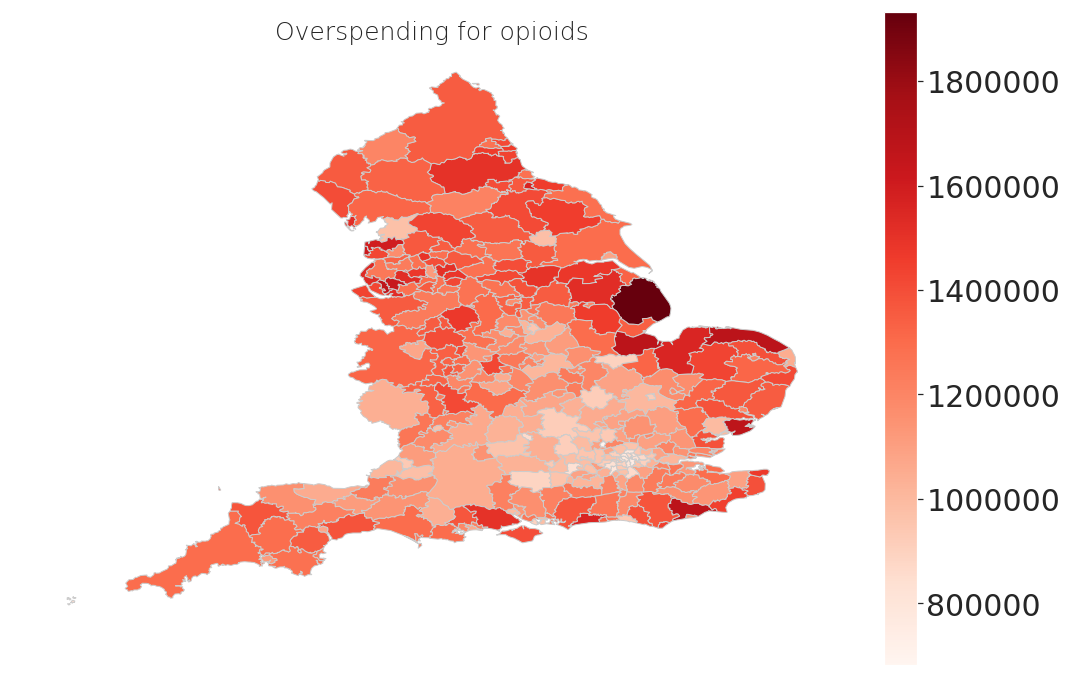

In [60]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Savings'
vmin, vmax = min(savings_df['Savings']) , max(savings_df['Savings'])

fig, ax = plt.subplots(1, figsize=(18, 12))
merged.plot(column=variable, cmap='Reds', linewidth=1, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Overspending for opioids', fontdict={'fontsize': 25, 'fontweight' : 20})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.yaxis.offsetText.set(size=20)
cbar.ax.tick_params(labelsize=30) 

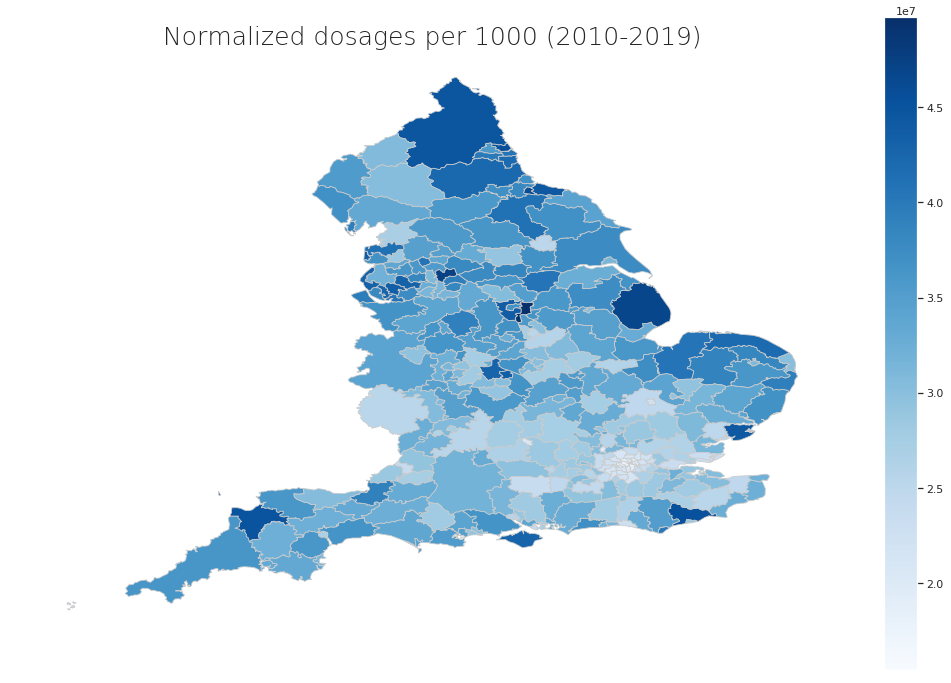

In [61]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Dosage'
vmin, vmax = min(savings_df['Dosage']) , max(savings_df['Dosage'])

fig, ax = plt.subplots(1, figsize=(18, 12))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Normalized dosages per 1000 (2010-2019)', fontdict={'fontsize': 25, 'fontweight' : 5})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [62]:
standardized_merged = merged.copy()

In [63]:
def normalize(df,feature_names):
    result = df.copy()
    for feature_name in feature_names:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [64]:
standardized_merged = normalize(merged , ['Savings','Density','Dosage','IMD','Seniors','Population'])

Text(0.8,0.1,'Corr: 0.79')

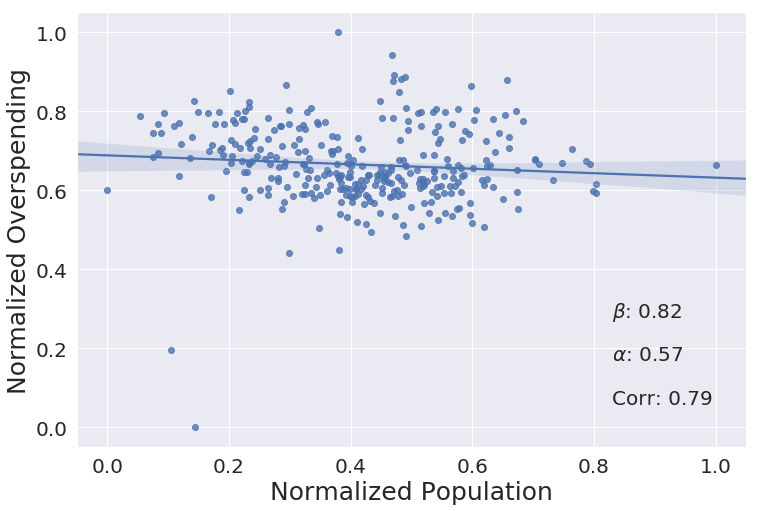

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
p = sns.regplot(x=standardized_merged['Savings'],y=standardized_merged['Population'],ax=ax)
ax.set_xlabel("Normalized Population",fontsize=25)
ax.set_ylabel("Normalized Overspending",fontsize=25)
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )
ax.annotate(r"$\beta$" +": " +  '0.82', xy=(0.8, 0.3), xycoords='axes fraction',fontsize = 20)
ax.annotate(r"$\alpha$" +": " +  '0.57', xy=(0.8, 0.2), xycoords='axes fraction',fontsize = 20)
ax.annotate("Corr" +": " +  '0.79', xy=(0.8, 0.1), xycoords='axes fraction',fontsize = 20)


In [66]:
from scipy.stats import linregress

corr = pearsonr(merged['Savings'], merged['Population'])
print corr

covariance = np.cov(merged['Savings'], merged['Population'])[0][1]
variance = np.var(merged['Savings'])
covariance/variance

slope, intercept, r_value, p_value, std_err = linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())

print slope,  intercept , r_value , p_value , std_err

(-0.09259914638577811, 0.09510016189396542)
-0.05647003041047701 0.6886714617560051 -1.0 0.0 0.0


In [67]:
standardized_merged.head()

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,dummp
lad17nm,,,,,,,,,,,,,,,,,,
Hartlepool,1,E06000001,None,447157,531476,-1.27023,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...,0.067302,0.625731,0.761571,0.600649,0.476681,0.502048,1.186351e+08,0.0
Middlesbrough,2,E06000002,None,451141,516887,-1.21099,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...,0.181541,0.894161,0.951849,0.666795,0.708822,0.399775,2.200000e+08,0.0
Redcar and Cleveland,3,E06000003,None,464359,519597,-1.00611,54.567520,2.471405e+08,78666.802657,(POLYGON ((-1.200218311029187 54.5830013303063...,0.037741,0.842468,0.636909,0.662361,0.624310,0.605706,1.981224e+08,0.0
Stockton-on-Tees,4,E06000004,None,444937,518183,-1.30669,54.556911,2.064738e+08,86947.340766,POLYGON ((-1.193937249483723 54.62987548771687...,0.065298,0.663230,0.530334,0.718970,0.543137,0.453415,2.666587e+08,0.0
Darlington,5,E06000005,None,428029,515649,-1.56835,54.535351,1.982990e+08,91341.118700,POLYGON ((-1.439939711064031 54.59520822980085...,0.036621,0.632094,0.503677,0.622027,0.576497,0.520818,1.491205e+08,0.0


In [68]:
corr = pearsonr(standardized_merged['Dosage'], standardized_merged['IMD'])

Text(0.8,0.2,'Corr: 0.19')

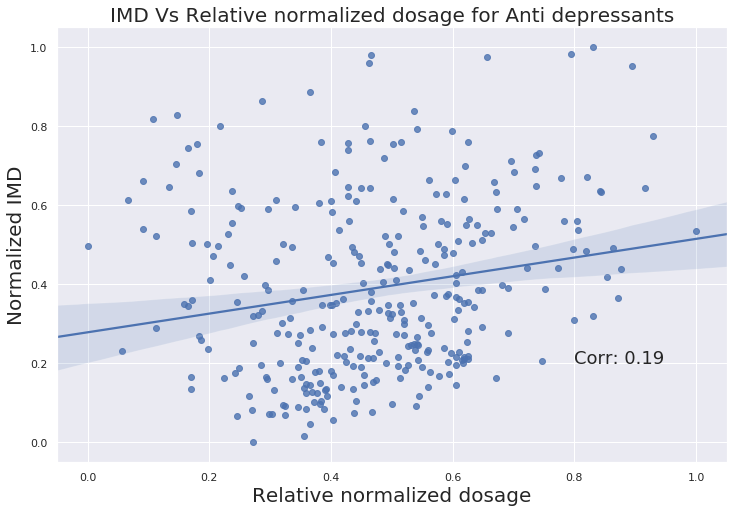

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Dosage',y='IMD',data=standardized_merged)
ax.set_title("IMD Vs Relative normalized dosage for Anti depressants" , fontsize=20)
ax.set_xlabel("Relative normalized dosage",fontsize=20)
ax.set_ylabel("Normalized IMD",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)


In [70]:
corr = pearsonr(standardized_merged['Savings'], standardized_merged['IMD'])

Text(0.8,0.2,'Corr: 0.19')

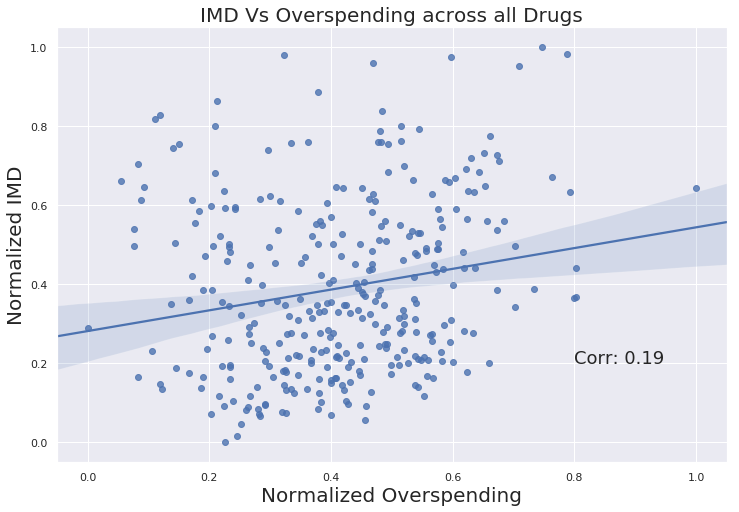

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='IMD',data=standardized_merged)
ax.set_title("IMD Vs Overspending across all Drugs" , fontsize=20)
ax.set_xlabel("Normalized Overspending",fontsize=20)
ax.set_ylabel("Normalized IMD",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)


In [72]:
corr = pearsonr(standardized_merged['Savings'], standardized_merged['Seniors'])

Text(0.8,0.2,'Corr: 0.61')

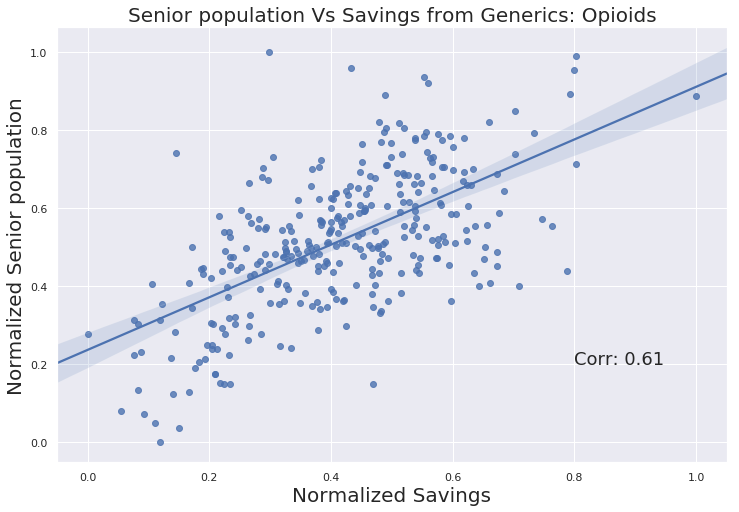

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='Seniors',data=standardized_merged)
ax.set_title("Senior population Vs Savings from Generics: Opioids" , fontsize=20)
ax.set_xlabel("Normalized Savings",fontsize=20)
ax.set_ylabel("Normalized Senior population",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)

In [74]:
corr=pearsonr(standardized_merged['Savings'], standardized_merged['Density'])

Text(0.8,0.8,'Corr: -0.4')

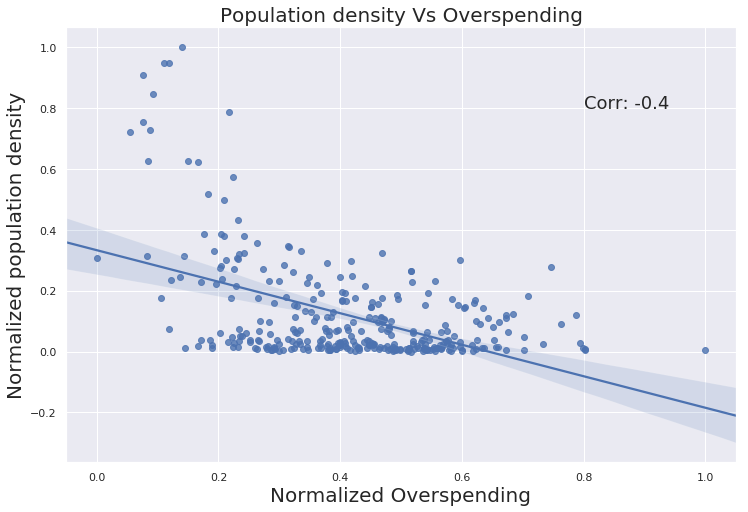

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='Density',data=standardized_merged)
ax.set_title("Population density Vs Overspending" ,fontsize=20)
ax.set_xlabel("Normalized Overspending",fontsize=20)
ax.set_ylabel("Normalized population density",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.8),fontsize = 18)

In [76]:
corr=pearsonr(standardized_merged['Dosage'], standardized_merged['Density'])

Text(0.8,0.8,'Corr: -0.5')

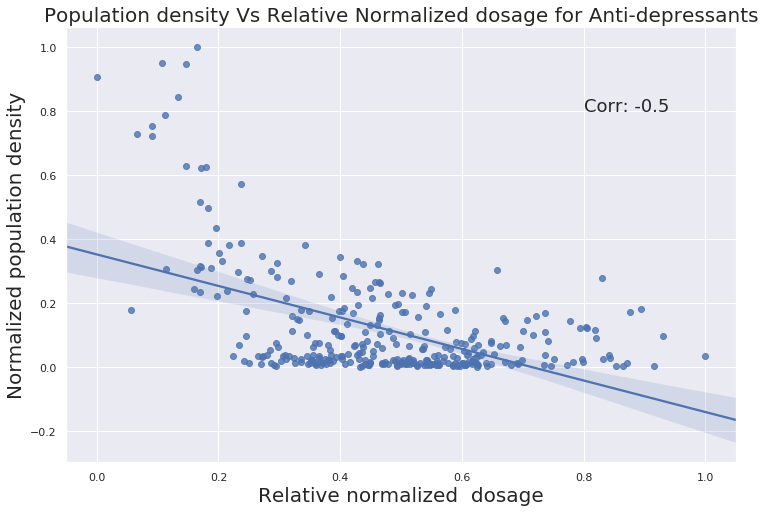

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Dosage',y='Density',data=standardized_merged)
ax.set_title("Population density Vs Relative Normalized dosage for Anti-depressants" ,fontsize=20)
ax.set_xlabel("Relative normalized  dosage",fontsize=20)
ax.set_ylabel("Normalized population density",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.8),fontsize = 18)


In [78]:
pearsonr(standardized_merged['Dosage'], standardized_merged['Seniors'])

(0.5479376812802115, 6.119811597155628e-27)

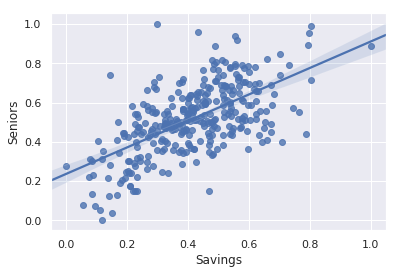

In [79]:
sns.regplot(x='Savings',y='Seniors',data=standardized_merged)

In [92]:
monthlySavings = {}
for k in monthly_borough_savings:
    monthlySavings[k] = np.median(monthly_borough_savings[k].values())
    
    
monthlyCosts = {}
for k in monthly_borough_costs:
    monthlyCosts[k] = np.median(monthly_borough_costs[k].values())

In [93]:
months = sorted(all_overspend['savings'].keys())

In [94]:
overspend = [all_overspend['savings'][k]/1000000.0 for k in months]

In [108]:
allcosts = [all_overspend['costs'][k]/1000000.0 for k in months]

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.set_style("white")
sns.lineplot(y=overspend,x=np.arange(0,len(months),1))
# sns.lineplot(y=savings_df['diabetes_over'],x=np.arange(0,len(savings_df),1))
# sns.lineplot(y=savings_df['opioid_over'],x=np.arange(0,len(savings_df),1))
ax = plt.gca()

# plt.xticks(np.arange(0,len(months)+1, 2.0))
labels= [months[3*i] for i in range(0,len(months)/3)]
print labels
plt.xticks(np.arange(0,len(months) ,3),labels,rotation=90,fontsize= 20)
plt.yticks(fontsize= 20)
# plt.legend(['Overspending for Depression', 'Overspending for Diabetes', 'Overspending for Opioids'], fontsize = 16)
plt.xlabel("Year and month  (YYYYMM) ",fontsize=25)
plt.ylabel(u'Overspending(£ Million)',fontsize=25)


In [155]:
monthLabels = ['Aug 2010', '' , '' ,'', '', 'Jan 2011', '' , '' , '' , '' , '' , 'July 2011','','','','','', 'Jan 2012','','','','','' ,'July 2012','','','','','', 'Jan 2013','','','','','' ,'July 2013','','','','','', 'Jan 2014','','','','','' ,'July 2014','','','','','', 'Jan 2015','','','','','' ,'July 2015','','','','','', 'Jan 2016' ,'','','','', '', 'July 2016','','','','', '', 'Jan 2017' ,'','','','', '','July 2017','','','','', '', 'Jan 2018' ,'','','','', '', 'July 2018', '','','','', '', 'Jan 2019' ,'','','','', 'June 2019']

Text(0,0.5,u'Overspending(\xa3 Million)')

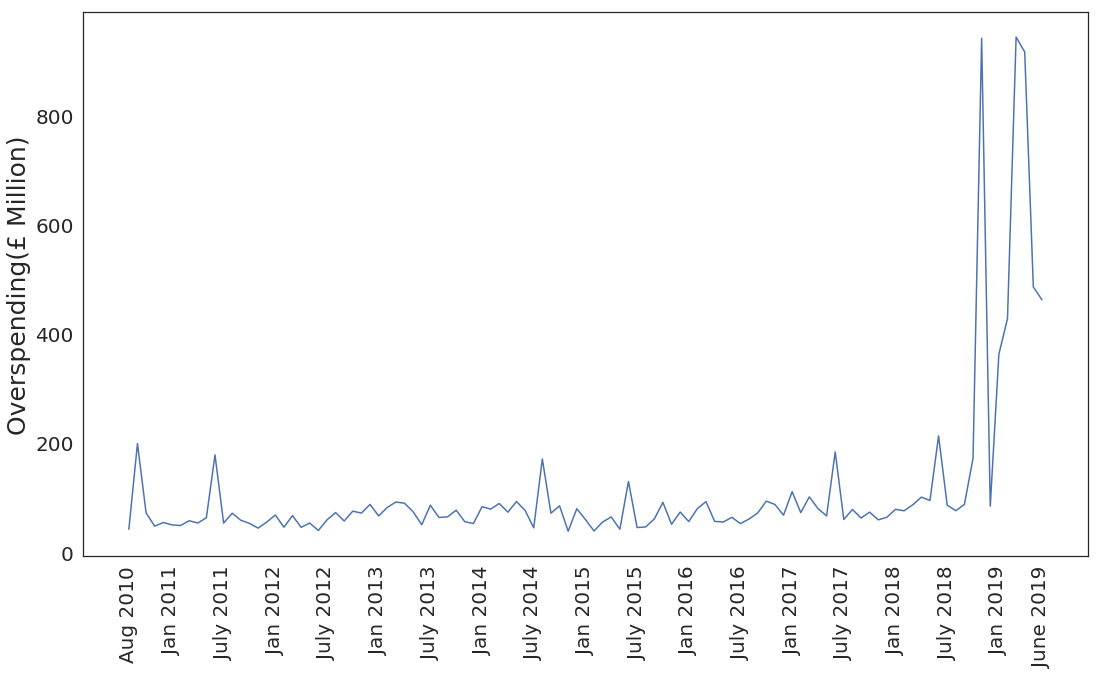

In [158]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.set_style("white")
sns.lineplot(y=overspend,x=np.arange(0,len(months),1))
# sns.lineplot(y=savings_df['diabetes_over'],x=np.arange(0,len(savings_df),1))
# sns.lineplot(y=savings_df['opioid_over'],x=np.arange(0,len(savings_df),1))
ax = plt.gca()

# plt.xticks(np.arange(0,len(months)+1, 2.0))
labels= [months[3*i] for i in range(0,len(months)/3)]
plt.xticks(np.arange(0,len(months) ,1),monthLabels,rotation=90,fontsize= 20)
plt.yticks(fontsize= 20)
# plt.legend(['Overspending for Depression', 'Overspending for Diabetes', 'Overspending for Opioids'], fontsize = 16)
# plt.xlabel("Year and month  (YYYYMM) ",fontsize=25)
plt.ylabel(u'Overspending(£ Million)',fontsize=25)
